<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C3W2_NLP_Reading_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNPV1NW/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNPV1NW/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNPV1NW/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
tokenizer = info.features['text'].encoder

In [10]:
# print(info)
# print(tokenizer.subwords)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [12]:
sample_string = 'TensorFlow, from basic to mastery'

tokenized_string = tokenizer.encode(sample_string)
print(f"Tokenized string is {tokenized_string}")

original_string = tokenizer.decode(tokenized_string)
print(f"The original string: {original_string}")

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 2715, 7, 2652, 8050]
The original string: TensorFlow, from basic to mastery


In [14]:
for ts in tokenized_string:
  print(f"{ts} --> {tokenizer.decode([ts])}")

6307 --> Ten
2327 --> sor
4043 --> Fl
2120 --> ow
2 --> , 
48 --> from 
2715 --> basic 
7 --> to 
2652 --> master
8050 --> y


In [29]:
buffer_size = 10000
batch_size = 64

train_dataset = train_data.shuffle(buffer_size=buffer_size)
train_dataset = train_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(test_data))

In [30]:
embedding_dim = 16

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)                        
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 10

model.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 9s 20ms/step - loss: 0.6917 - accuracy: 0.5403 - val_loss: 0.6754 - val_accuracy: 0.7377
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 0.6479 - accuracy: 0.7133 - val_loss: 0.5503 - val_accuracy: 0.7952
Epoch 3/10
391/391 [==============================] - 9s 21ms/step - loss: 0.5028 - accuracy: 0.8159 - val_loss: 0.4381 - val_accuracy: 0.8396
Epoch 4/10
391/391 [==============================] - 9s 21ms/step - loss: 0.3907 - accuracy: 0.8659 - val_loss: 0.3807 - val_accuracy: 0.8575
Epoch 5/10
391/391 [==============================] - 9s 21ms/step - loss: 0.3299 - accuracy: 0.8867 - val_loss: 0.3466 - val_accuracy: 0.8699
Epoch 6/10
391/391 [==============================] - 8s 20ms/step - loss: 0.2917 - accuracy: 0.8962 - val_loss: 0.3324 - val_accuracy: 0.8673
Epoch 7/10
391/391 [==============================] - 9s 20ms/step - loss: 0.2625 - accuracy: 0.9106 - val_loss: 0.3223 - val_accuracy: 0.8732

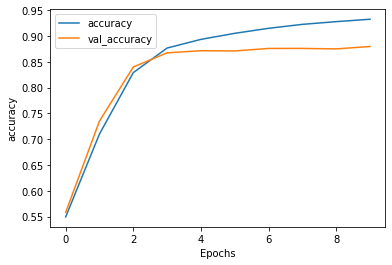

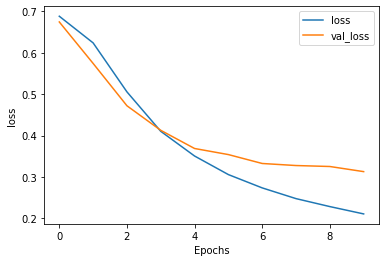

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")